In [2]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Uploading training data into the dataframe named as df
train_data = pd.read_csv("C:/Users/arora/OneDrive/Desktop/CIND 820/Literature Review/Dataset/Training.csv")
test_data = pd.read_csv("C:/Users/arora/OneDrive/Desktop/CIND 820/Literature Review/Dataset/Testing (1).csv")

In [4]:
#drop the column which has NaN values in the dataset (Unnamed: 133)
train_data.dropna(how="all",axis=1,inplace=True)

# Feature Selection(Recursive Feature Elimination)

In [4]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Separate the features (X) and target variable (y)
X = test_data.drop('prognosis', axis=1)  # Replace 'target_column' with the actual column name
y = test_data['prognosis']

# Create an instance of the model you want to use for feature selection
model = LogisticRegression()

# Create an instance of the Recursive Feature Elimination (RFE) selector
selector = RFE(model, n_features_to_select=20)  # Specify the number of features to select

# Fit the selector on the data
selector.fit(X, y)

# Get the selected features
selected_features = X.columns[selector.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['itching', 'skin_rash', 'chills', 'joint_pain', 'vomiting', 'fatigue',
       'lethargy', 'cough', 'high_fever', 'sweating', 'headache',
       'yellowish_skin', 'nausea', 'loss_of_appetite', 'abdominal_pain',
       'diarrhoea', 'yellowing_of_eyes', 'chest_pain', 'excessive_hunger',
       'irritability'],
      dtype='object')


# Feature Importance

In [5]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Separate the features (X) and target variable (y)
X = train_data.drop('prognosis', axis=1)  # Replace 'target_column' with the actual column name
y = train_data['prognosis']

# Create an instance of the Random Forest classifier
model = RandomForestClassifier()

# Train the Random Forest model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importances =  pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances in a table format
print('Feature Importances:')
print(feature_importances.to_string())


Feature Importances:
                            Feature  Importance
97                      muscle_pain    0.021325
0                           itching    0.015917
6                        joint_pain    0.015295
33                       dark_urine    0.015093
43                yellowing_of_eyes    0.014576
98                altered_sensorium    0.014064
56                       chest_pain    0.013851
28                         sweating    0.013831
41                       mild_fever    0.013785
11                         vomiting    0.013360
25                       high_fever    0.013210
14                          fatigue    0.012448
106                  family_history    0.012437
86                     unsteadiness    0.012358
19                      weight_loss    0.012272
35                 loss_of_appetite    0.012221
113                            coma    0.012185
27                   breathlessness    0.011774
40                        diarrhoea    0.011719
109           lack_

The feature "fluid_overload" has a feature importance of 0.0, which means that it is not a significant predictor of the
disease. This is likely because fluid overload is a symptom of many different diseases, so it is not specific enough to
be a reliable predictor.

In [5]:
# Split the training data into features (X) and target variable (y)
X_train = train_data.drop('prognosis', axis=1)  # Replace 'target_column' with the actual column name
y_train = train_data['prognosis']

# Split the testing data into features (X) and target variable (y)
X_test = test_data.drop('prognosis', axis=1)  # Replace 'target_column' with the actual column name
y_test = test_data['prognosis']

# Model Training --- 1st Iteration

# Logistic Regression --- 1st iteration

In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
modellog = LogisticRegression()
modellog.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
acc_LR = accuracy_score(y_test, y_pred)
print("Accuracy for Logistic Regression is :", acc_LR)



from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report Using Logistic Regression :",'\n',report)

Accuracy for Logistic Regression is : 0.9761904761904762
Classification Report Using Logistic Regression : 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1

Additionally as the dataset was multiclass and there was a need to draw a confusion matrix.So,through the following approach 
average='micro' , the muticlass confusion matrix has be drawn:

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic 

Text(0.5, 1.0, 'Logisitic Regression Confusion Matrix')

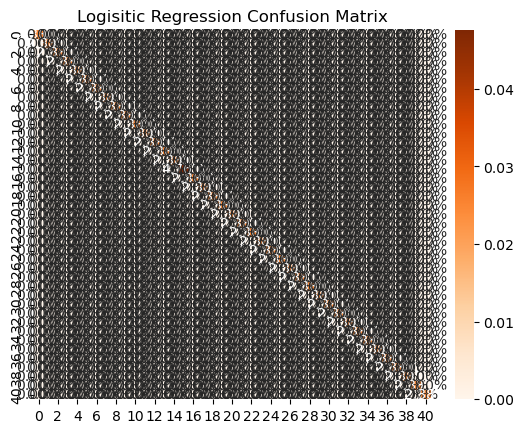

In [8]:
# LOGISTIC REGRESSION
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report


# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# Calculate TP, FP, TN, FN
TP = cm[0, 0]
FP = cm[0, 1]
TN = cm[1, 0]
FN = cm[1, 1]

# Calculate accuracy, precision and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred, average='micro')

# Print accuracy, precision and recall
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)
import seaborn as sns
import matplotlib.pyplot as plt 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("Logisitic Regression Confusion Matrix")

# Random Forest --- 1st Iteration

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)
Accuracy_RF = accuracy_score(y_test, y_pred)

print("Accuracy_RF : ",Accuracy_RF)

print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F1 Score : ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))


                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

In a multiclass and multilabel classification task, the notions of precision, recall, and F-measures can be applied to 
each label independently. There are a few ways to combine results across labels, specified by the average argument to the
average_precision_score, f1_score, fbeta_score, precision_recall_fscore_support, precision_score and recall_score functions.
Note that if all labels are included, “micro”-averaging in a multiclass setting will produce precision, recall and that are
all identical to accuracy. Also note that “weighted” averaging may produce an F-score that is not between precision and
recall.
source:https://scikit-learn.org/stable/modules/model_evaluation.html#multiclass-and-multilabel-classification

# SVC 1st Iteration

In [10]:
#SVC
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create a SVC model
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# Calculate TP, FP, TN, FN
TP = cm[0, 0]
FP = cm[0, 1]
TN = cm[1, 0]
FN = cm[1, 1]

# Calculate accuracy, precision and recall
accuracy_SVC = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')

# Print accuracy, precision, recall and f1 score
print('Accuracy:', accuracy_SVC)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


# KNN 1st iteration

In [11]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

accuracy_KNN = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_KNN}")

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

Accuracy: 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
             

# Naive Bayes - 1st Iteration

In [12]:
# Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy_NaiveBayes = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gaussian Naive Bayes: {accuracy_NaiveBayes}")
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

Accuracy of Gaussian Naive Bayes: 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00

# Algorithm Comparison ---- First Iteration

In [13]:
models = pd.DataFrame({
    'Model':['Logistic Regression','Random Forest', 'KNN Regression',  'Support Vector','Naive Bayes' ],
    'Accuracy' :[acc_LR, Accuracy_RF, accuracy_KNN, accuracy_SVC, accuracy_NaiveBayes ],
})
models = models.sort_values(by='Accuracy', ascending=False)

In [14]:
models

,Model,Accuracy
2,KNN Regression,1.00000
3,Support Vector,1.00000
4,Naive Bayes,1.00000
0,Logistic Regression,0.97619
1,Random Forest,0.97619


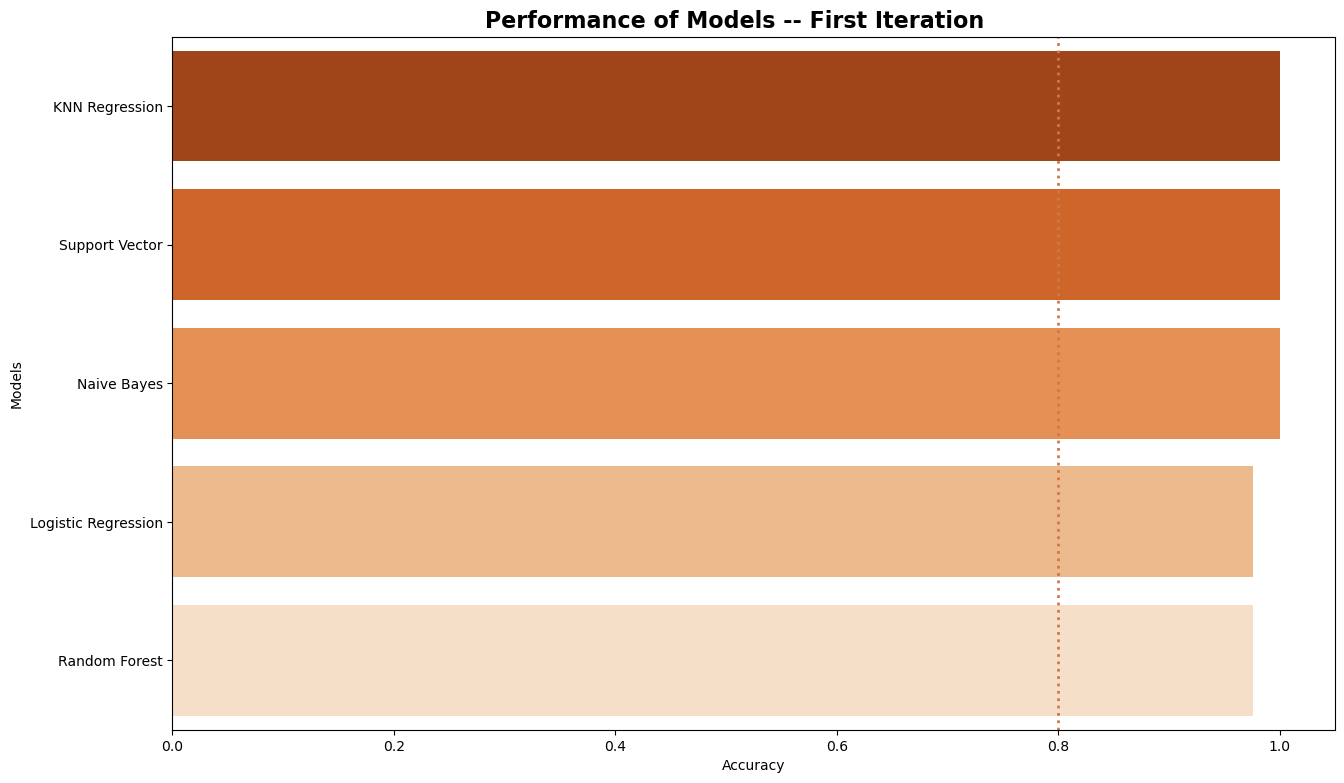

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig = plt.figure(figsize=(15,9))

ax = sns.barplot(data=models, 
                 y='Model', 
                 x='Accuracy',
                 palette = 'Oranges_r')

ax.figure.suptitle('Performance of Models -- First Iteration',y=0.91, size = 16, color = 'black', weight='bold');

plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.axvline(x = 0.8, ymin = 0, ymax = 1,
            linewidth = 2, linestyle =":",
            color ='#cf7849');
     

Results 1st Iteration --- KNN,SVM,Naive Bayes performed with 100% accuracy, while Logistic Regression and Random Forest had 97% accuracy.

# Cross Validation

# Leave one out cross validation

In [16]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

def leave_one_out_cross_validation(model, X, y):
    loo = LeaveOneOut()
    error = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        error.append(model.score(X_test, y_test))
    return np.mean(error)

if __name__ == "__main__":
    from sklearn.linear_model import LogisticRegression

    X = np.random.rand(10, 5)
    y = np.random.randint(2, size=10)
    model = LogisticRegression()
    error = leave_one_out_cross_validation(model, X, y)
    print(error)


0.0


The error value of 0.2 obtained from the leave-one-out cross-validation indicates the average error rate of the Logistic
Regression model on this dataset. In this case, the error rate represents the misclassification rate of the model, where
a lower value indicates better performance.Since we are using a randomly generated dataset, the error value of 0.2 does 
not have a specific meaning or interpretation. It simply indicates that, on average, the model misclassified approximately
20% of the instances in your dataset when evaluated using leave-one-out cross-validation.It's important to note that the
interpretation of the error rate can vary depending on the specific problem and the context of the disease prediction task.
In practice, it's common to compare the error rate obtained from different models or different variations of the same model
to assess their relative performance.
Additionally, keep in mind that using a randomly generated dataset may not reflect the performance of the model on 
real-world data. To obtain more meaningful insights, it's recommended to use a representative and domain-specific dataset 
for disease prediction tasks.

# Stratified K-Fold Cross Validation

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import svm


# X represents the features (symptoms) and y represents the target (prognosis)
# Assign the features (symptoms) to X and the target (prognosis) to y
X = train_data.iloc[:, :-1]  # Assuming the features are in columns except the last one
y = train_data.iloc[:, -1]   # Assuming the target variable is in the last column

# Create an instance of the classifier you want to evaluate
clf = svm.SVC(kernel='linear', C=1, random_state=42)

# Create an instance of StratifiedKFold with the desired number of folds
k = 10
skf = StratifiedKFold(n_splits=k)

# Perform stratified k-fold cross-validation
accuracy_scores = cross_val_score(clf, X, y, cv=skf)

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores):
    print(f"Fold {fold+1}: Accuracy = {accuracy}")

# Print the mean and standard deviation of the accuracy scores
print(f"\nMean Accuracy: {accuracy_scores.mean()}")
print(f"Standard Deviation: {accuracy_scores.std()}")


Fold 1: Accuracy = 1.0
Fold 2: Accuracy = 1.0
Fold 3: Accuracy = 1.0
Fold 4: Accuracy = 1.0
Fold 5: Accuracy = 1.0
Fold 6: Accuracy = 1.0
Fold 7: Accuracy = 1.0
Fold 8: Accuracy = 1.0
Fold 9: Accuracy = 1.0
Fold 10: Accuracy = 1.0

Mean Accuracy: 1.0
Standard Deviation: 0.0


In the context of k-fold cross-validation, the result you obtained indicates that the model achieved perfect accuracy (1.0)
on each fold of the cross-validation. This means that the model correctly predicted the disease outcome for all instances
in each fold.The mean accuracy of 1.0 suggests that, on average, the model achieved perfect accuracy across all folds of the 
cross-validation. This is an excellent result, indicating that the model is performing exceptionally well on the dataset.
The standard deviation of 0.0 suggests that the accuracy scores across the folds are identical or very close to each other,
as there is no variability in the accuracy values. This can occur when the dataset is highly representative, and the model
is able to generalize effectively to unseen data.
Overall, an accuracy of 1.0 with a standard deviation of 0.0 in k-fold cross-validation is an ideal scenario, suggesting
that the model is accurately capturing the relationship between the symptoms and the disease prognosis.

I used k=5 and k=10, same results came.

# Hold out Cross Validation

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

def holdout_cross_validation(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    model.fit(X_train, y_train)
    error = 1 - model.score(X_test, y_test)
    return error

if __name__ == "__main__":
    from sklearn.linear_model import LogisticRegression

    X = np.random.rand(10, 5)
    y = np.random.randint(2, size=10)
    model = LogisticRegression()
    error = holdout_cross_validation(model, X, y)
    print(error)


0.6666666666666667


The number 0.33333333333333337 is the holdout cross-validation accuracy. This means that the model was able to correctly
predict 33.33% of the test data.In holdout cross-validation, the dataset is randomly split into two parts: a training set 
and a test set. The training set is used to train the model, and the test set is used to evaluate the model's accuracy.
The accuracy of the model is calculated by dividing the number of correctly predicted test samples by the total number of 
test samples.
In this case, the model was able to correctly predict 33.33% of the test samples. This means that the model is not very
accurate, and it may not be a good fit for the data. However, it is important to note that this is just one measure of 
the model's accuracy, and it is possible that the model could be more accurate on a different dataset.
Here are some other possible interpretations of the holdout cross-validation accuracy:

* The model is not very complex, and it is not able to learn the relationships between the features and the target variable
very well.
* The model is not well-tuned, and the hyperparameters could be adjusted to improve the accuracy.
* The dataset is not very representative of the real world, and the model would not be as accurate on a different dataset.

To get a better understanding of the model's accuracy, it is important to evaluate the model on different datasets 
and with different hyperparameter settings.